# Automobile Price Prediction Project using Python


# Model Development


Here in this project ,we want to prepare a model to determine the price of a car.
In our dataset, we have some cars data ,dataset includes the features of car and the price at which car was sold off.
from this dataset ,we intend to prepare a model so that we can predict the price of some newly added cars in our dataset accurately.

Some questions we can answer using this project,

<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>
<p>In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>


We have already determined the features which determines the price of the car,
we would now try to find the correct model type
and at last ,we would prepare the model ,prepare a training and testing data set
to predict the price of car for new dataset



<p>In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>


<h4>Setup</h4>


Import libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

Load the cleaned data and store it in dataframe `df`:


In [2]:
filename = r"D:\gaurav_data_analyst\Car_Price_Model\car_data_cleaned.csv"
df = pd.read_csv(filename)
pd.set_option('display.max_columns',None)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.014888,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.014888,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.015213,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.015375,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.015422,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


<h2>1. Linear Regression and Multiple Linear Regression</h2>


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-L/100km</li>
    <li>length</li>
    <li>width</li>
    <li>city-L/100km</li>
</ul>
Let's develop a model using these variables as the predictor variables.


<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()

<h4>How could "highway-mpg" ,"engine-size" and other important varaibles help us predict car price?</h4>
To answer this,I have used linear regression for each of the important variables and print out the Rsq value and MSE value to determine which of these variables can predict the price better.

In [4]:
X = df[['highway-mpg']]
X2 = df[['engine-size']]
X3 = df[['curb-weight']]
X4 = df[['horsepower']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)

print("Linear Regression of price with highway-mpg")
print("Intercept is: ",lm.intercept_,'and slope is: ',lm.coef_)
print('The R square value for price and highway-mpg is ',lm.score(X,Y))
print('The mean square error of price and predicted value using linefit is: ',mean_squared_error(Y, Yhat))
print('')
lm.fit(X2,Y)
Yhat2=lm.predict(X2)
print("Linear Regression of price with engine-size")
print("Intercept is: ",lm.intercept_,'and slope is: ',lm.coef_)
print('The R square value for price and engine-size is ',lm.score(X2,Y))
print('The mean square error of price and predicted value using linefit is: ',mean_squared_error(Y, Yhat2))
print('')
lm.fit(X3,Y)
Yhat3=lm.predict(X3)
print("Linear Regression of price with curb-weight")
print("Intercept is: ",lm.intercept_,'and slope is: ',lm.coef_)
print('The R square value for price and curb-weight is ',lm.score(X3,Y))
print('The mean square error of price and predicted value using linefit is: ',mean_squared_error(Y, Yhat3))
print('')
lm.fit(X4,Y)
Yhat4=lm.predict(X4)
print("Linear Regression of price with horsepower")
print("Intercept is: ",lm.intercept_,'and slope is: ',lm.coef_)
print('The R square value for price and horsepower is ',lm.score(X4,Y))
print('The mean square error of price and predicted value using linefit is: ',mean_squared_error(Y, Yhat4))


Linear Regression of price with highway-mpg
Intercept is:  38423.305858157386 and slope is:  [-821.73337832]
The R square value for price and highway-mpg is  0.4965911884339175
The mean square error of price and predicted value using linefit is:  31635042.944639895

Linear Regression of price with engine-size
Intercept is:  -7963.338906281046 and slope is:  [166.86001569]
The R square value for price and engine-size is  0.7609686443622008
The mean square error of price and predicted value using linefit is:  15021126.025174143

Linear Regression of price with curb-weight
Intercept is:  -19553.570636227472 and slope is:  [12.818847]
The R square value for price and curb-weight is  0.6962476008164489
The mean square error of price and predicted value using linefit is:  19088303.52574716

Linear Regression of price with horsepower
Intercept is:  -4597.8519845471565 and slope is:  [172.19020636]
The R square value for price and horsepower is  0.6554631732894476
The mean square error of pric

We can say that \~76% of the variation of the price is explained by this simple linear model "engine-size_fit".
But still it is not enough.

<h4>Multiple Linear Regression</h4>
Now we will use Multiple linear regression of price with all of the above listed variables.

In [5]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km','length','width','city-L/100km']]
lm.fit(Z, df['price'])
Y_hat=lm.predict(Z)
print("Intercept is: ",lm.intercept_,'and slope is: ',lm.coef_)
print('The R square value for price and highway-mpg is ',lm.score(Z,Y))
print('The mean square error of price and predicted value using multifit is: ',mean_squared_error(Y, Y_hat))

Intercept is:  -47923.67335266487 and slope is:  [ 1.54359061e+01  2.63100474e+00  9.13242162e+01 -6.88075658e+02
 -1.15726839e+04  5.08183090e+04  9.99765350e+02]
The R square value for price and highway-mpg is  0.8229998801133092
The mean square error of price and predicted value using multifit is:  11122980.498498566


We can say that \~82.29 % of the variation of price is explained by this multiple linear regression "multi_fit".


##### So we can conclude that multiple regression is better for this case,

## Training set and Testing set
Now we will prepare two data sets from the data itself i.e. Training and Testing data set,
We will train the model with training set and then test the testing data to find how well our model can predict the prices.

In [6]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lre = LinearRegression()
lre.fit(x_train,y_train)
print("The Rsq value for training set is ",lre.score(x_train,y_train))
print("The Rsq value for test set is ",lre.score(x_test,y_test))
yhat_train = lre.predict(x_train)
yhat_test = lre.predict(x_test)

number of test samples : 61
number of training samples: 140
The Rsq value for training set is  0.8312539890725793
The Rsq value for test set is  0.7812560814966989


Now our multifit model has been created ,so I have now created a Distribution plot to check how well the Training and Test predicted price values have fitted as compared to the actual values of price.

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()

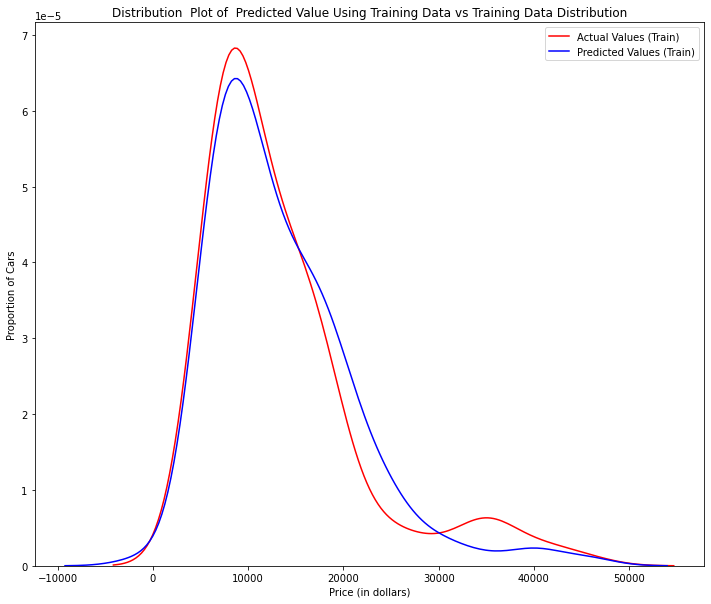

In [8]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

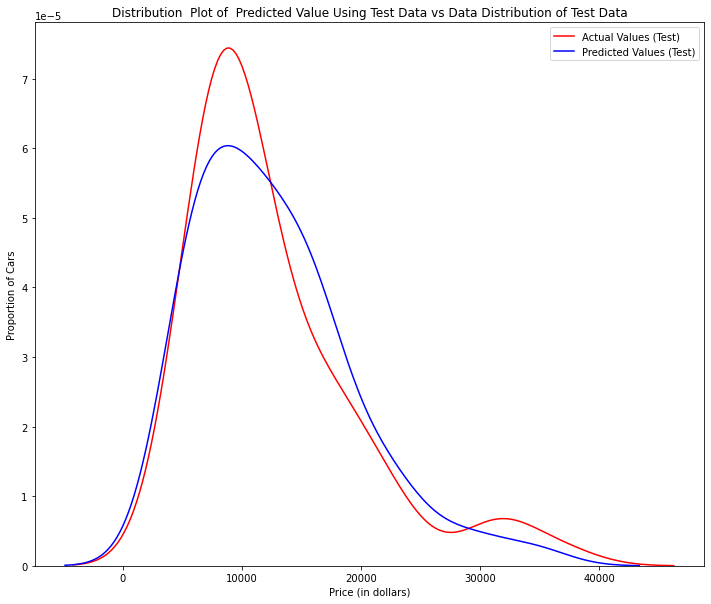

In [9]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

We can see that although the test data is fitting fine ,but still there is room for improvement.

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>
<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>
<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

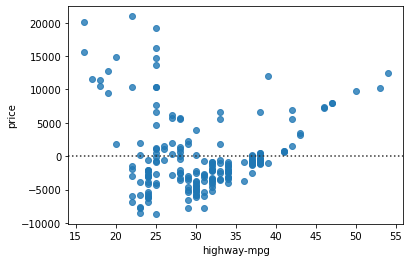

In [10]:
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()


<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>
Now I'll choose a 2nd order polynomial to check if we'd get any better result with highway-mpg parameter or not.

In [11]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's get the variables:


In [12]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 2)
p = np.poly1d(f)
print(p)

       2
45.35 x - 3773 x + 8.419e+04


Let's plot the function:


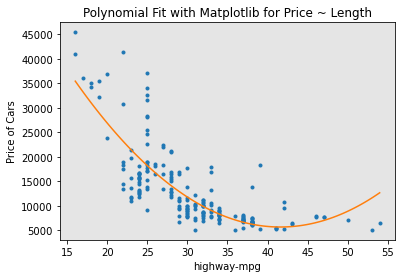

In [13]:
PlotPolly(p, x, y, 'highway-mpg')

In [14]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
print('The MSE value is:',mean_squared_error(df['price'], p(x)))

The R-square value is:  0.651793603702672
The MSE value is: 21881866.283181377


We can say that \~65 % of the variation of price is explained by this polynomial fit.


<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>
Also the Rsq value of highway-mpg with 2nd order is better than the same with 1st order.


<b>Now what if we apply the higher order polynomial fit to the multiple varibles ?</b>
We'll now check what order data would give the maximum Rsq value.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

The Rsq values per orders is  [0.7812560814966982, 0.8774962761030748, -70.78759362099461]


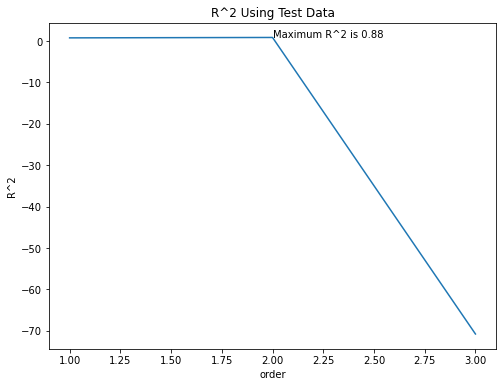

In [16]:
Rsqu_test = []

order = [1, 2,3]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train)
    
    x_test_pr = pr.fit_transform(x_test)    
    
    lre.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lre.score(x_test_pr, y_test))
plt.figure(figsize=(8,6))
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
print("The Rsq values per orders is ",Rsqu_test)
plt.text(2, round(max(Rsqu_test),2), 'Maximum R^2 is '+str(round(max(Rsqu_test),2))) 
plt.show()

This suggests that a polynomial of second order would fit the model better.

<h2>Pipeline</h2>
Here I have created a Pipeline to transform the data into Polynomial of order 2 and then I have Scaled the data and then fitted the data into a linear regression model.

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [18]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2,include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

pipe.fit(x_train,y_train)
Yhat_train = pipe.predict(x_train)
Yhat_test = pipe.predict(x_test)
print("The R sq value for training set is: ",pipe.score(x_train,y_train))
print('The mean square error of price and predicted value for training set is: ',mean_squared_error(Yhat_train, y_train))
print('')
print("The R sq value for test set is: ",pipe.score(x_test,y_test))
print('The mean square error of price and predicted value for test set is: ',mean_squared_error(Yhat_test, y_test))

The R sq value for training set is:  0.9406518312478069
The mean square error of price and predicted value for training set is:  4059188.891788842

The R sq value for test set is:  0.8724614987579901
The mean square error of price and predicted value for test set is:  6330370.93116253


Now to check how good the model is, I have created the Distribution Plot for Training and Test data.

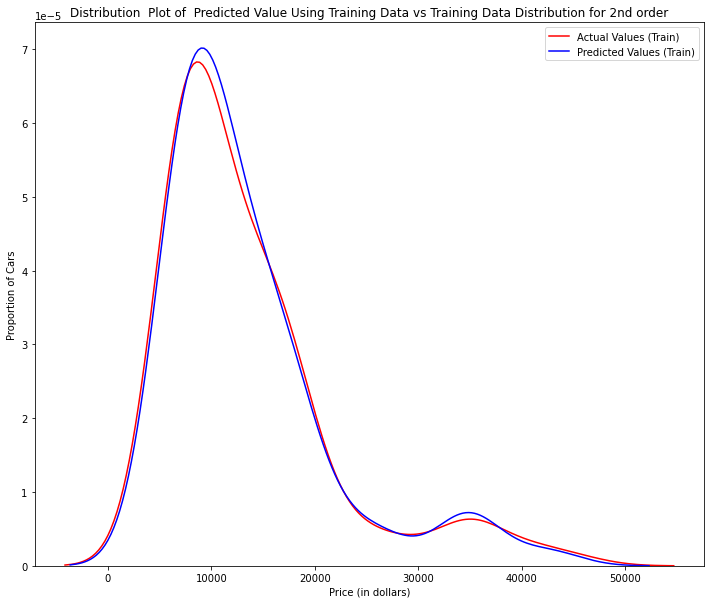

In [19]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution for 2nd order'
DistributionPlot(y_train, Yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

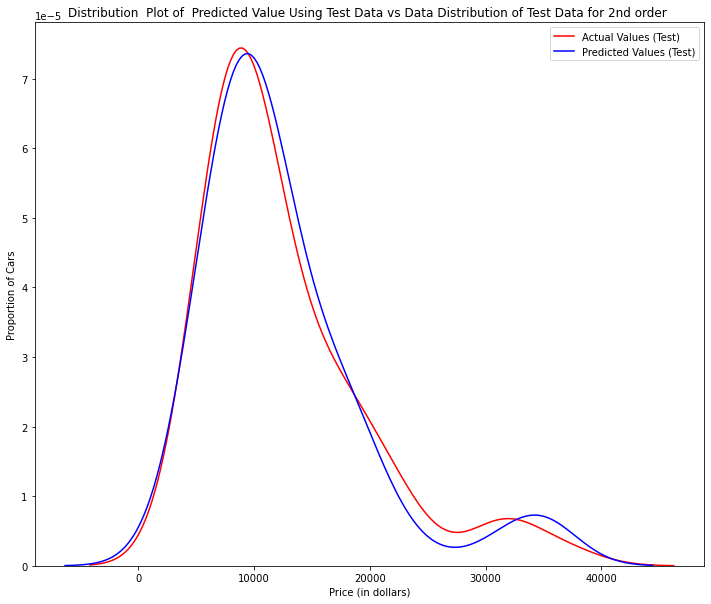

In [20]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data for 2nd order '
DistributionPlot(y_test,Yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

### Wonderful
We have found the perfect model for our data set
now we just have to refine it.

<h2 id="ref4">Ridge Regression for different parameters</h2>


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

100%|███████████████████████████████████████| 1000/1000 [00:03<00:00, 284.30it/s, Test Score=-.0824, Train Score=0.986]


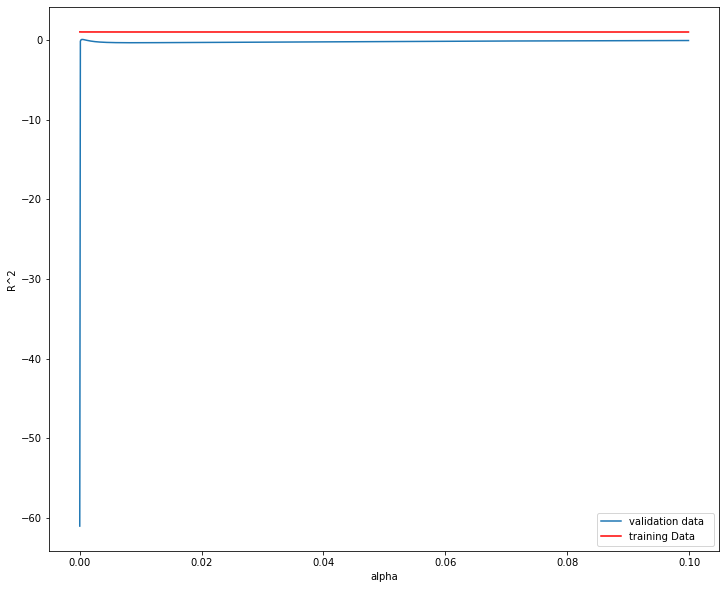

In [22]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = np.arange(0,.1,0.0001)
#Alpha=np.append(Alpha,0)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)
    
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

so data is best refined at alpha = 0

In [23]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
RigeModel=Ridge(alpha=0)
RigeModel.fit(x_train_pr, y_train)

test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
print("Rsq value for training set is ",train_score)
print("Rsq value for testing set is ",test_score)

Rsq value for training set is  0.9383400640886348
Rsq value for testing set is  0.877995303970711


<h2>Conclusion</h2>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, We can conclude about the best model.
We can see that best fitted model is the one that we get with the ['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km','length','width','city-L/100km'] variables ,
    Then we have found that after transforming the data as a 2nd order polynomial ,and fitting as a linear regression ,we get better Rsq and MSE values.
    Also the alpha as 0 value give the best result.

So now if price of some new cars data is to be predicted , we can predict the prices by using the predict function and passing the data of the independent variables.
We can use the grid search cv for the whole data as train set and the new data whose price is to be predicted as the test data set
using the grid search we can determine the best parameters and thus predict the prices.
I will add the procedure below in comments.

In [24]:
'''
import the new data whose prices are to be predicted
x = pd.read_csv(r'')

pr = PolynomialFeatures(degree=2,include_bias=False)
Z_pr = pr.fit_transform(Z)
x_pr = pr.fit_transform(x)

parameters = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]
grid = GridSearchCV(Ridge(),parameters,cv=4)
grid.fit(Z_pr,Y)
best_est = grid.best_estimator_
yhat_pr = RigeModel.predict(x_pr)

'''

"\nimport the new data whose prices are to be predicted\nx = pd.read_csv(r'')\n\npr = PolynomialFeatures(degree=2,include_bias=False)\nZ_pr = pr.fit_transform(Z)\nx_pr = pr.fit_transform(x)\n\nparameters = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]\ngrid = GridSearchCV(Ridge(),parameters,cv=4)\ngrid.fit(Z_pr,Y)\nbest_est = grid.best_estimator_\nyhat_pr = RigeModel.predict(x_pr)\n\n"